In [201]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


In [202]:
# ---------------------------------------------------------------------------
# -----------------------------------SETTINGS--------------------------------
# ---------------------------------------------------------------------------
# Change the path_no, speed_no and angle to select which set of data you want to visualise.
# To switch between 1 charging station and 2 charging stations, switch between /New_1Intermediate and /New_2Intermediate
# When visualising tests where there was NO wind, set the speed_no to 0, and angle to None, otherwise the code will throw an error. 

path_no = 5
speed_no = 2
angle = 90

parent_folder = "/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/flying"

dataE3 = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E3.csv")
dataE5 = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E5.csv")
dataE7 = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E7.csv")

# Changing milliseconds to seconds.
dataE3["time.ms"] = dataE3["time.ms"].map(lambda x : x/1000)
dataE5["time.ms"] = dataE5["time.ms"].map(lambda x : x/1000)
dataE7["time.ms"] = dataE7["time.ms"].map(lambda x : x/1000)

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# No wind variants used for comparison later:
dataE3_no_wind = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E3.csv")
dataE3_no_wind["time.ms"] = dataE3_no_wind["time.ms"].map(lambda x : x/1000)

dataE5_no_wind = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E5.csv")
dataE5_no_wind["time.ms"] = dataE5_no_wind["time.ms"].map(lambda x : x/1000)

dataE7_no_wind = pd.read_csv(f"{parent_folder}/New_1Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E7.csv")
dataE7_no_wind["time.ms"] = dataE7_no_wind["time.ms"].map(lambda x : x/1000)





Text(0, 0.5, 'Voltage')

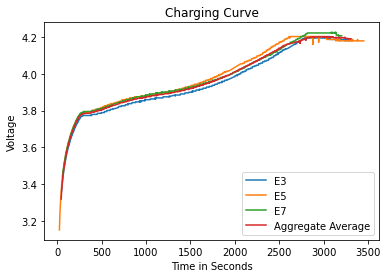

In [203]:
# ---------------------------------------------------------------------------
# ------------------------------CHARGING OVER TIME---------------------------
# ---------------------------------------------------------------------------


chargingE7 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE7.csv")
chargingE5 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/battery1.csv")
chargingE3 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE3.csv")

# Convert milliseconds to seconds:
chargingE3["time.ms"] = chargingE3["time.ms"].map(lambda x : x/1000)
chargingE5["time.ms"] = chargingE5["time.ms"].map(lambda x : x/1000)
chargingE7["time.ms"] = chargingE7["time.ms"].map(lambda x : x/1000)

# Plot three drone charging curves:
charginggraph = chargingE3.plot(x="time.ms", y="pm.vbat")
chargingE5.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
chargingE7.plot(x="time.ms", y ="pm.vbat", ax= charginggraph)

# Line of best fit from three charging curves:
aggregate_avg = {"pm.vbat": (chargingE3["pm.vbat"] + chargingE5["pm.vbat"] + chargingE7["pm.vbat"]).map(lambda x : x/3), 
            "time.ms": (chargingE7["time.ms"]+chargingE3["time.ms"]+chargingE5["time.ms"]).map(lambda x : x/3)} 
avg_charge_df = pd.DataFrame(aggregate_avg)
avg_charge_df.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
# batterygraph.set_xlim(0, None)

# Formatting:
charginggraph.legend(["E3","E5","E7","Aggregate Average"])
charginggraph.set_title("Charging Curve")
charginggraph.set_xlabel("Time in Seconds")
charginggraph.set_ylabel("Voltage")

601    60.1
602    60.2
603    60.3
604    60.4
605    60.5
Name: time.ms, dtype: float64
1146    114.6
1147    114.7
1148    114.8
1149    114.9
1150    115.0
Name: time.ms, dtype: float64


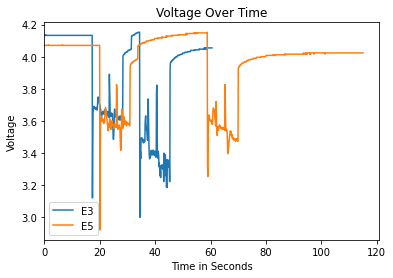

In [204]:
# ---------------------------------------------------------------------------
# ------------------------------BATTERY MAPPING------------------------------
# ---------------------------------------------------------------------------


# Graphing voltage over time.
batterygraph = dataE3.plot(x="time.ms", y="pm.vbat")
dataE3_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
print(dataE3["time.ms"].tail())
print(dataE3_no_wind["time.ms"].tail())
# dataE5.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
# dataE7.plot(x="time.ms", y ="pm.vbat", ax= batterygraph)
batterygraph.set_xlim(0, None)
batterygraph.legend(["E3","E5","E7"])
batterygraph.set_title("Voltage Over Time")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

# Other syntax for plotting multiple graphs in one axes:
# fig = plt.figure()
# for frame in [dataE3, dataE5, dataE7]:
#     plt.plot(frame['time.ms'], frame['pm.vbat'])


plt.show()

With Wind Gradient:
-0.003999517857605158
NO Wind Gradient:
0.00031759501907826127


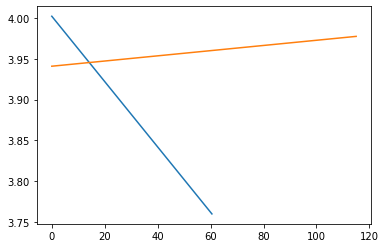

In [205]:
# ---------------------------------------------------------------------------
# -----------------------COMPARING GRADIENTS OF VOLTAGE----------------------
# ---------------------------------------------------------------------------

# Line of best fit: Wind vs No Wind
m, b = np.polyfit(dataE3["time.ms"], dataE3["pm.vbat"], 1)
plt.plot(dataE3["time.ms"], m*dataE3["time.ms"]+b)
print("With Wind Gradient:")
print(m)


m1, b1 = np.polyfit(dataE3_no_wind["time.ms"], dataE3_no_wind["pm.vbat"], 1)
plt.plot(dataE3_no_wind["time.ms"], m1*dataE3_no_wind["time.ms"]+b1)
print("NO Wind Gradient:")
print(m1)

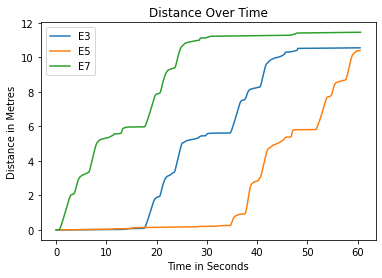

In [206]:
# ---------------------------------------------------------------------------
# -------------------------------DISTANCE MAPPING----------------------------
# ---------------------------------------------------------------------------

distancegraph = dataE3.plot(x="time.ms", y="travel_dist")
dataE5.plot(x="time.ms", y="travel_dist", ax = distancegraph)
dataE7.plot(x="time.ms", y="travel_dist", ax = distancegraph)
distancegraph.legend(["E3","E5","E7"])
distancegraph.set_title("Distance Over Time")
distancegraph.set_xlabel("Time in Seconds")
distancegraph.set_ylabel("Distance in Metres")
plt.show()

# How many seconds would it take to fully charge:
# First find the number of seconds:
# np.interp(3.7, time_data, volt_data)

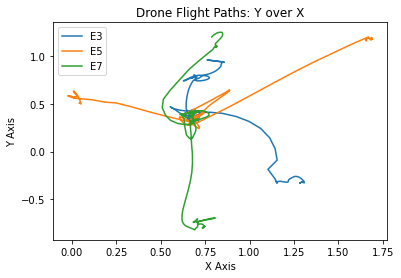

In [207]:
# ---------------------------------------------------------------------------
# ---------------------------X, Y COORDINATES MAPPING------------------------
# ---------------------------------------------------------------------------

x_ycoord = dataE3.plot(x="stateEstimate.x", y="stateEstimate.y")
dataE5.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
dataE7.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
x_ycoord.legend(["E3","E5","E7"])
x_ycoord.set_title("Drone Flight Paths: Y over X")
x_ycoord.set_xlabel("X Axis")
x_ycoord.set_ylabel("Y Axis")
plt.show()


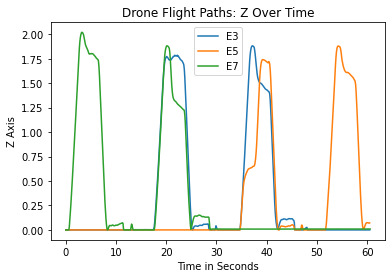

In [208]:
# ---------------------------------------------------------------------------
# ----------------------------Z COORDINATES MAPPING--------------------------
# ---------------------------------------------------------------------------

z_coord = dataE3.plot(x="time.ms", y="stateEstimate.z")
dataE5.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
dataE7.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
z_coord.legend(["E3","E5","E7"])
z_coord.set_title("Drone Flight Paths: Z Over Time")
z_coord.set_xlabel("Time in Seconds")
z_coord.set_ylabel("Z Axis")
plt.show()





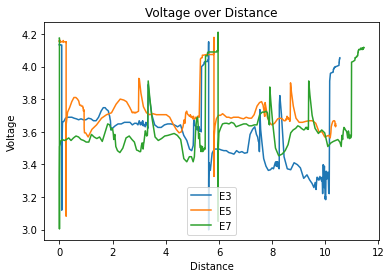

In [209]:
# ---------------------------------------------------------------------------
# ------------------------Voltage Change Over Distance-----------------------
# ---------------------------------------------------------------------------

distance_voltage = dataE3.plot(x="travel_dist", y="pm.vbat")
dataE5.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
dataE7.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
distance_voltage.legend(["E3","E5","E7"])
distance_voltage.set_title("Voltage over Distance")
distance_voltage.set_xlabel("Distance")
distance_voltage.set_ylabel("Voltage")
plt.show()


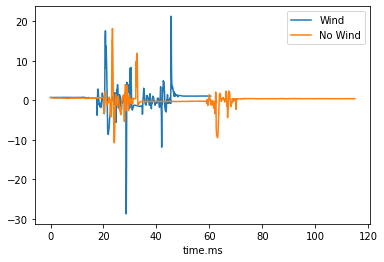

Standard Deviation of Drone E3 with Wind
2.8157473187094104
Standard Deviation of Drone E3 with NO Wind
1.6311385739739266


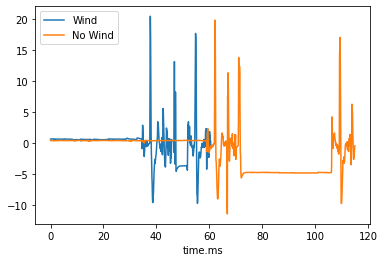

Standard Deviation of Drone E5 with Wind
2.7013365094829664
Standard Deviation of Drone E5 with NO Wind
3.0431775969572388


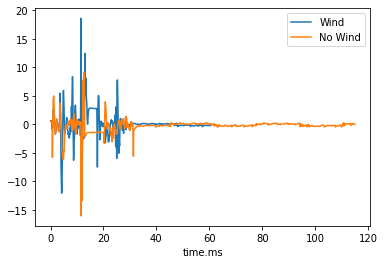

Standard Deviation of Drone E7 with Wind
2.2042850451614804
Standard Deviation of Drone E7 with NO Wind
1.1913207293209003


In [210]:
# ---------------------------------------------------------------------------
# --------------------------PITCH FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------


# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


pitch_time = dataE3.plot(x="time.ms", y ="stabilizer.pitch")
pitch_time = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.pitch"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.pitch"].std())

# pitch_boxplot_E3 = dataE3.boxplot(column=["stabilizer.pitch"])
# pitch_bx = dataE3_no_wind.boxplot(column=["stabilizer.pitch"])

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

pitch_time = dataE5.plot(x="time.ms", y ="stabilizer.pitch")
pitch_time = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.pitch"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.pitch"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------


pitch_time = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
pitch_time = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


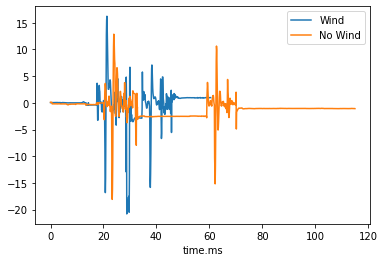

Standard Deviation of Drone E3 with Wind
3.657454261692272
Standard Deviation of Drone E3 with NO Wind
1.9487464322486123


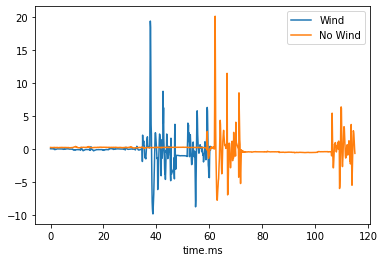

Standard Deviation of Drone E5 with Wind
2.125723769326305
Standard Deviation of Drone E5 with NO Wind
1.5144582956236519


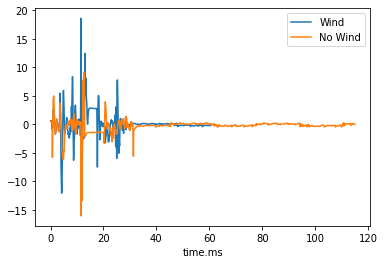

Standard Deviation of Drone E7 with Wind
2.2042850451614804
Standard Deviation of Drone E7 with NO Wind
1.1913207293209003


In [211]:
# ---------------------------------------------------------------------------
# --------------------------ROLL FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


pitch_time = dataE3.plot(x="time.ms", y ="stabilizer.roll")
pitch_time = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.roll"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

pitch_time = dataE5.plot(x="time.ms", y ="stabilizer.roll")
pitch_time = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.roll"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

pitch_time = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
pitch_time = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


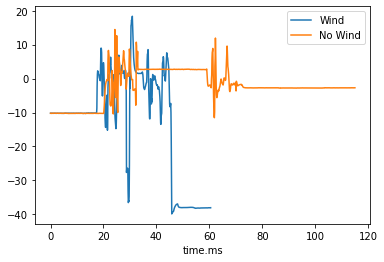

Standard Deviation of Drone E3 with Wind
15.912064534800681
Standard Deviation of Drone E3 with NO Wind
4.706410819159685


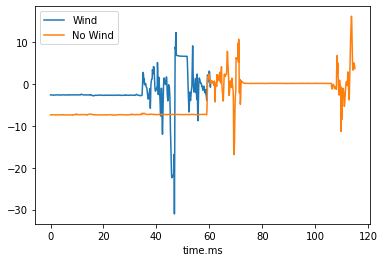

Standard Deviation of Drone E5 with Wind
4.397132381999898
Standard Deviation of Drone E5 with NO Wind
4.288954583550042


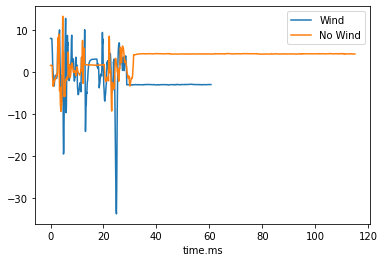

Standard Deviation of Drone E7 with Wind
4.512160205235396
Standard Deviation of Drone E7 with NO Wind
2.338311993180275


In [212]:
# ---------------------------------------------------------------------------
# --------------------------YAW FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------
# Yaw may not be so relevant as the drone would remain level when changing yaw so doesn't indicate instability necessarily.
# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


pitch_time = dataE3.plot(x="time.ms", y ="stabilizer.yaw")
pitch_time = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.yaw"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.yaw"].std())

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

pitch_time = dataE5.plot(x="time.ms", y ="stabilizer.yaw")
pitch_time = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.yaw"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.yaw"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

pitch_time = dataE7.plot(x="time.ms", y ="stabilizer.yaw")
pitch_time = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = pitch_time)
pitch_time.legend(["Wind", "No Wind"])
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.yaw"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.yaw"].std())


- Possibly do a wind speed vs stasndard deviation of pitch, roll, and yaw as a scatter plot across all data? Shows correlation between increased wind speed and lack of stability in drone?
- Show that the line of best fit of the voltage has a steeper gradient on drones with a wind speed of 2 vs 1, and 1 vs none?
- Visualise waiting times of the three drones? How does w
